In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [20]:
%matplotlib inline

In [3]:
from sklearn.preprocessing import scale

In [4]:
from sklearn.datasets import load_digits

# Get Data

In [9]:
digits = load_digits()

In [10]:
print digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']


In [14]:
print digits.data.mean(), digits.data.var()

4.88416457986 36.2017324059


In [15]:
data = scale(digits.data)

In [16]:
print data.mean(), data.var()

8.6494837756e-19 0.953125


# Show Data

In [24]:
def print_digits(images, y, max_n=10):
    fig = plt.figure(figsize=(12,12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1,
          hspace=0.05, wspace=0.05)
    i = 0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(20,20, i+1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        p.text(0,14, str(y[i]))
        i = i+1

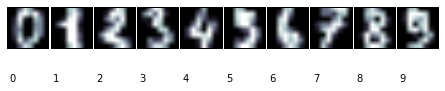

In [25]:
print_digits(digits.images, digits.target)

# Clustering

In [26]:
from sklearn.cross_validation import train_test_split

In [27]:
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target, digits.images, 
                                                                               test_size=0.25, random_state=42)

In [28]:
from sklearn import cluster

In [59]:
kMeans = cluster.KMeans(n_clusters=10, n_init=10, random_state=42)

In [60]:
kMeans = kMeans.fit(X_train)

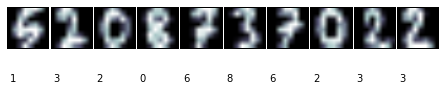

In [61]:
print_digits(images_train,kMeans.labels_)

In [62]:
y_pred = kMeans.predict(X_test)

In [63]:
def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    print_digits(images, y_pred)

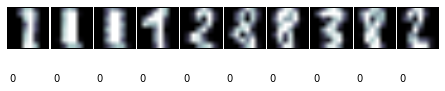

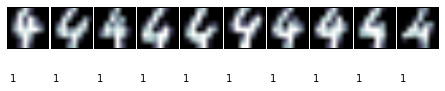

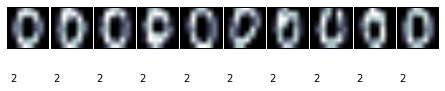

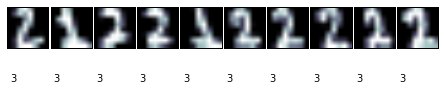

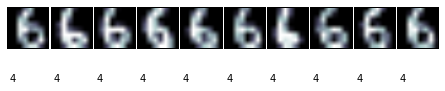

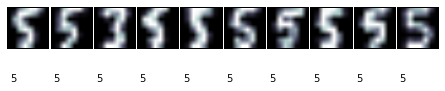

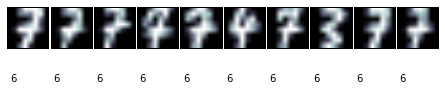

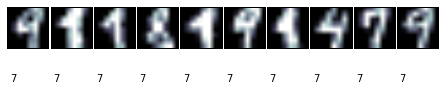

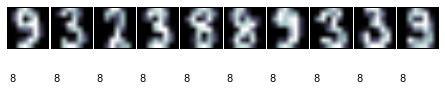

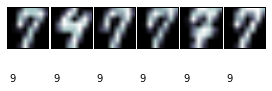

In [64]:
for i in xrange(10):
    print_cluster(images_test, y_pred, i)

## Evaluation

## Rand index

In [65]:
from sklearn import metrics

In [66]:
print "Adjusted Rand index score:{0:.3f}".format(metrics.adjusted_rand_score(y_test, y_pred))

Adjusted Rand index score:0.567


In [67]:
print metrics.confusion_matrix(y_test, y_pred)

[[ 0  0 43  0  0  0  0  0  0  0]
 [20  0  0  7  0  0  0 10  0  0]
 [ 5  0  0 31  0  0  0  1  1  0]
 [ 1  0  0  1  0  1  4  0 39  0]
 [ 1 50  0  0  0  0  1  2  0  1]
 [ 1  0  0  0  1 41  0  0 16  0]
 [ 0  0  1  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  1 34  1  0  5]
 [21  0  0  0  0  3  1  2 11  0]
 [ 0  0  0  0  0  2  3  3 40  0]]


In [69]:
from sklearn import decomposition

In [71]:
pca = decomposition.PCA(n_components=2).fit(X_train)

In [72]:
X_train_reduced = pca.transform(X_train)

In [73]:
h = 0.01

In [75]:
x_min, x_max = X_train_reduced[:,0].min(), X_train_reduced[:,0].max()

In [76]:
y_min, y_max = X_train_reduced[:,1].min(), X_train_reduced[:,1].max()

In [77]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [78]:
kmeans = cluster.KMeans(n_clusters=10, n_init=10)

In [79]:
kmeans = kmeans.fit(X_train_reduced)

In [80]:
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

In [81]:
Z = Z.reshape(xx.shape)

([], <a list of 0 Text yticklabel objects>)

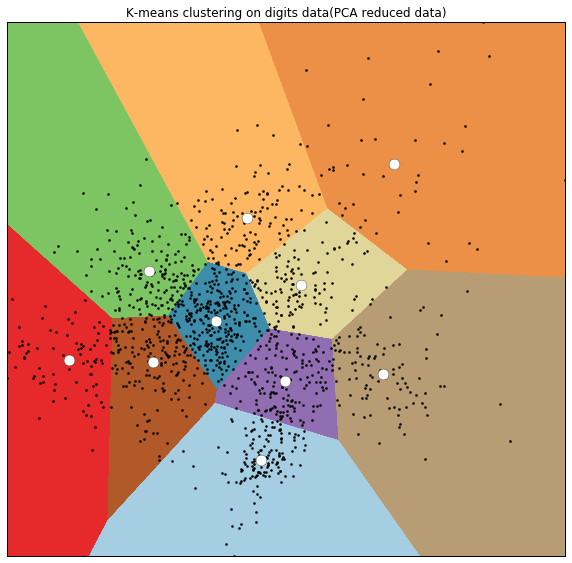

In [133]:
plt.subplots(figsize=(10,10))
plt.clf()
plt.imshow(Z, cmap=plt.cm.Paired, extent=(xx.min(), xx.max(), yy.min(), yy.max()),origin='lower')
plt.plot(X_train_reduced[:,0], X_train_reduced[:,1],'k.',markersize=4)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1],marker='.',c='w',s=469, linewidths=.3, zorder=10)
plt.title('K-means clustering on digits data(PCA reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks([])
plt.yticks([])